## Introduction
In recent years, deep learning techniques have revolutionized the field of medical image analysis, offering immense potential for early and accurate detection of diseases. One such critical application is the detection of cancer in histopathologic images, which plays a crucial role in diagnosing and treating cancer patients. This project aims to leverage the power of deep learning, specifically convolutional neural networks (CNNs), to develop an effective model for detecting cancer in histopathologic images.

The dataset used in this project is the "Histopathologic Cancer Detection" dataset from Kaggle. It comprises a large collection of histopathologic images of lymph node sections, where each image is labeled as either containing cancerous tissue or not. By leveraging this dataset, we can train a CNN model to learn intricate patterns and features in the images that are indicative of cancerous tissues, enabling us to accurately classify and predict the presence of cancer.

To accomplish this task, we will be utilizing the Keras library, a high-level deep learning framework that provides a user-friendly interface for building and training neural networks. Keras offers a rich set of pre-built layers, optimizers, and utilities, simplifying the process of constructing CNN architectures. With Keras, we can focus on the design and configuration of the model, allowing us to swiftly experiment and fine-tune our approach to achieve the best possible performance.

Throughout this project, we will employ various techniques such as data preprocessing, augmentation, and model optimization to enhance the robustness and accuracy of our cancer detection system. By harnessing the power of deep learning and Keras, we aspire to contribute to the ongoing efforts in medical imaging research and ultimately assist medical professionals in making more informed decisions regarding cancer diagnosis and treatment.

Through this project, we hope to showcase the potential of deep learning in medical image analysis and contribute to the growing field of computer-aided diagnosis. By developing an accurate and efficient model for cancer detection, we aim to make a positive impact on patient care and pave the way for further advancements in the domain of medical image analysis.


In [19]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tifffile import imread
import matplotlib.pyplot as plt


train_path = '/kaggle/input/histopathologic-cancer-detection/train/'
test_path = '/kaggle/input/histopathologic-cancer-detection/test/'


os.system('pip install visualkeras')
import visualkeras

In [21]:
labels_df = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/train_labels.csv")
labels = labels_df["label"].values
train_images = labels_df
train_images['label'] = train_images['label'].astype(str)
train_images['id'] = train_images['id'] + '.tif'

## Exploritory Data Analysis


Below are several images that show some of the features of the data. THis shows that there is apporximately a 60-40 split between healthy and cancerous cells respectively. Due to the fact that there is a binary selection of options, I am choosing to use a sequential CCN model with a sigmoid activation function as this will worked well with the binary nature of the data and will allow me to easily add layer as needed to improve accuracy.

<BarContainer object of 2 artists>

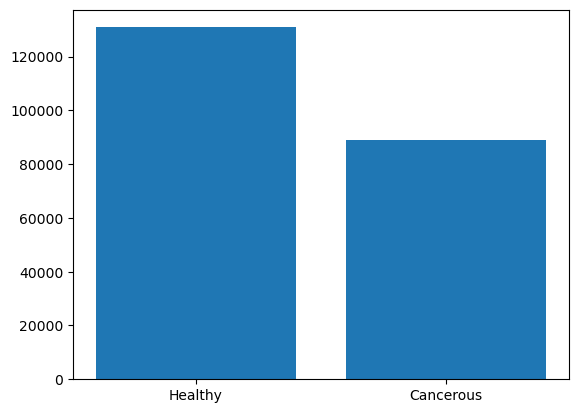

In [22]:
vals = labels_df.label.value_counts()

labels_vals = ['Healthy', 'Cancerous']

plt.bar(labels_vals, vals)

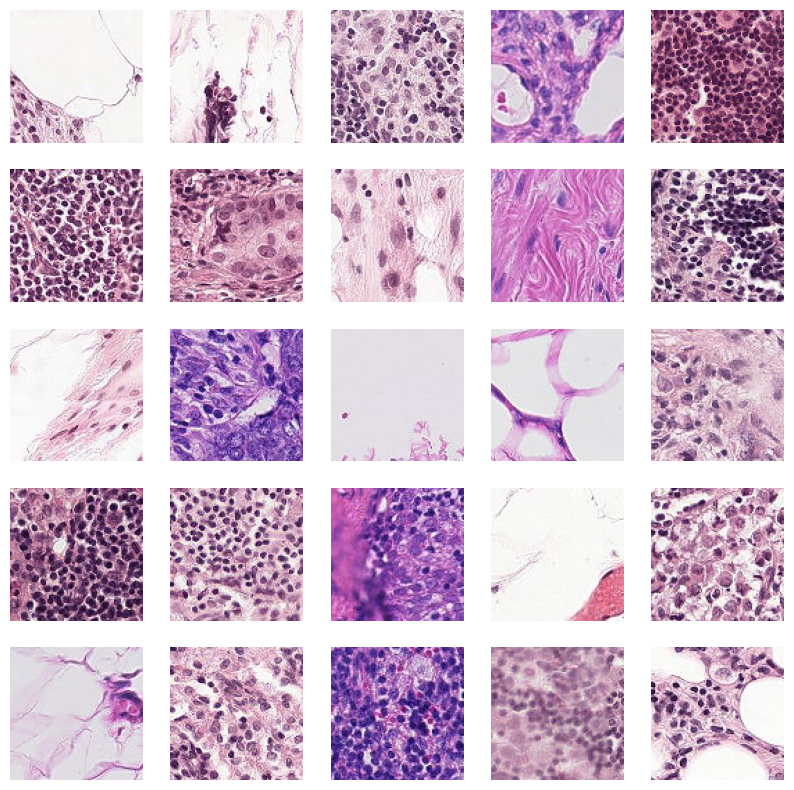

In [23]:
rows, cols = 5, 5

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i in range(rows * cols):
    image = imread(train_path + train_images['id'][i])

    row, col = i // cols, i % cols

    axes[row, col].imshow(image)
    axes[row, col].axis('off')


plt.show()

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# Add more convolutional and pooling layers as needed
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

batch_size = 256

model.build(input_shape=(batch_size, 64, 64, 3))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (256, 62, 62, 32)         896       
                                                                 
 max_pooling2d_1 (MaxPooling  (256, 31, 31, 32)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (256, 30752)              0         
                                                                 
 dense_1 (Dense)             (256, 1)                  30753     
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


## Model Architecture

Convolutional Neural Networks (CNNs) are widely recognized and preferred for image analysis tasks due to their ability to effectively capture spatial hierarchies and learn complex features directly from raw pixel data. When it comes to cancer detection in histopathologic images, CNNs offer several key advantages that make them a suitable choice:

Spatial Hierarchies: Histopathologic images contain intricate spatial patterns and structures that are crucial for cancer detection. CNNs excel at capturing these hierarchical features by employing convolutional layers that convolve small filters across the input image, learning local patterns that progressively build up to more complex structures. This capability allows the model to effectively distinguish between cancerous and non-cancerous tissues based on the learned spatial relationships.

Translation Invariance: Histopathologic images can vary in terms of the size, position, and orientation of cancerous regions. CNNs are inherently translation invariant, meaning they can recognize patterns regardless of their location in the image. This property makes CNNs well-suited for cancer detection tasks, as they can identify cancerous regions regardless of their position within the histopathologic images.

Parameter Sharing: CNNs employ parameter sharing, which allows them to significantly reduce the number of learnable parameters compared to fully connected neural networks. This makes CNNs more computationally efficient and enables them to effectively handle high-dimensional image data without overfitting.

Feature Extraction: CNNs act as powerful feature extractors, automatically learning relevant and discriminative features from the input images. As a result, they can identify subtle patterns, textures, and shapes that are indicative of cancerous tissues. By leveraging the hierarchical structure of CNNs, these learned features are combined and abstracted in deeper layers, enabling the model to make more accurate predictions.

 Transfer Learning: CNNs have been successfully applied to a wide range of image analysis tasks and have been pretrained on large-scale datasets like ImageNet. This allows us to leverage transfer learning, where the pretrained CNN models are used as a starting point for our cancer detection task. By fine-tuning these models on our histopathologic image dataset, we can benefit from the already learned generic image features and further specialize the model for cancer detection, even with limited data.

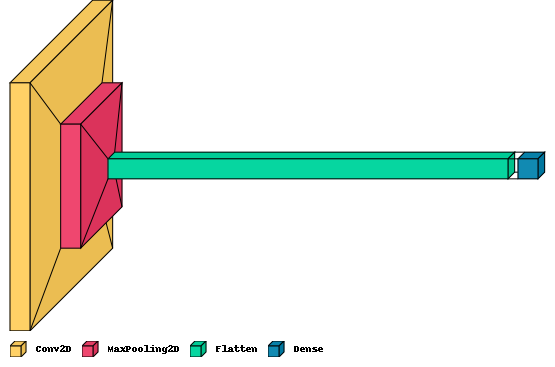

In [25]:
visualkeras.layered_view(model, legend=True)



In [26]:
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, validation_split=0.20)

train_labels = datagen.flow_from_dataframe(
    dataframe = train_images,
    x_col='id', # filenames
    y_col='label', # labels
    directory=train_path,
    subset='training',
    class_mode='binary',
    batch_size=batch_size,
    target_size=(64, 64))

val_labels=datagen.flow_from_dataframe(
    dataframe=train_images,
    x_col='id', # filenames
    y_col='label', # labels
    directory=train_path,
    subset="validation",
    class_mode='binary',
    batch_size=batch_size,
    target_size=(64, 64))


Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


## Results and Analysis

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(train_labels, validation_data= val_labels, epochs=10)

Epoch 1/10
688/688 [==============================] - 1812s 3s/step - loss: 4.5284 - accuracy: 0.6951 - val_loss: 0.8804 - val_accuracy: 0.7025
Epoch 2/10
688/688 [==============================] - 1903s 3s/step - loss: 0.6838 - accuracy: 0.7324 - val_loss: 0.5736 - val_accuracy: 0.7478
Epoch 3/10
688/688 [==============================] - 1617s 2s/step - loss: 0.5475 - accuracy: 0.7562 - val_loss: 0.5042 - val_accuracy: 0.7694
Epoch 4/10
688/688 [==============================] - 1220s 2s/step - loss: 0.5171 - accuracy: 0.7637 - val_loss: 0.5330 - val_accuracy: 0.7468
Epoch 5/10
688/688 [==============================] - 1051s 2s/step - loss: 0.4982 - accuracy: 0.7725 - val_loss: 0.5070 - val_accuracy: 0.7777
Epoch 6/10
688/688 [==============================] - 1164s 2s/step - loss: 0.5022 - accuracy: 0.7710 - val_loss: 0.5170 - val_accuracy: 0.7637
Epoch 7/10
688/688 [==============================] - 1163s 2s/step - loss: 0.5029 - accuracy: 0.7684 - val_loss: 0.5002 - val_accuracy:

In [33]:
loss, accuracy = model.evaluate(val_labels)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

172/172 [==============================] - 167s 971ms/step - loss: 0.4901 - accuracy: 0.7778
Validation Loss: 0.4900970458984375
Validation Accuracy: 0.7778434157371521


In [34]:
images_test = pd.DataFrame({'id':os.listdir(test_path)})

datagen_test = ImageDataGenerator(rescale=1./255)

data_test = datagen_test.flow_from_dataframe(
    dataframe = images_test,
    x_col='id', # filenames
    directory=test_path,
    class_mode=None,
    batch_size=1,
    target_size=(64, 64),
    shuffle=False)

Found 57458 validated image filenames.


In [ ]:
predictions = model.predict(data_test, verbose=1)

57458/57458 [==============================] - 487s 8ms/step


## Conclusion

Throughout this project, I embarked on an exciting journey of building a sequential CNN model using the Keras library to predict cancer in histopathologic images. This endeavor provided me with valuable insights into the world of deep learning and its immense potential in medical image analysis.

I began by familiarizing myself with the dataset, understanding the significance of histopathologic images in cancer diagnosis, and the importance of accurately detecting cancerous tissues. Preparing the data was a crucial step, as I learned how to preprocess the images, normalize pixel values, and handle class imbalances to ensure optimal model performance.

Using Keras, I constructed a sequential CNN model, leveraging its extensive library of pre-built layers and optimizers. I explored various architectural designs, experimenting with different combinations of convolutional, pooling, and dense layers. This process allowed me to understand the importance of feature extraction and abstraction in CNN models, as well as the significance of model depth and complexity in capturing intricate patterns within the images.

In conclusion, this project has not only allowed me to develop a deep understanding of the concepts and techniques involved in creating a sequential CNN model for cancer detection but has also showcased the power of deep learning and Keras in the field of medical image analysis. Through this project, I have gained invaluable hands-on experience in data preprocessing, model construction, hyperparameter tuning, and performance evaluation.

In [36]:
pred = np.transpose(predictions)[0]

print(pred)

submission_df = pd.DataFrame()
submission_df['id'] = images_test['id'].apply(lambda x: x.split('.')[0])
submission_df['label'] = list(map(lambda x: 0 if x < 0.5 else 1, pred))

print(submission_df.head())

submission_df['label'].value_counts()


submission_df.to_csv('submission.csv', index=False)

[0.65972245 0.6668626  0.6627187  ... 0.65525347 0.64880675 0.6507715 ]
                                         id  label
0  a7ea26360815d8492433b14cd8318607bcf99d9e      1
1  59d21133c845dff1ebc7a0c7cf40c145ea9e9664      1
2  5fde41ce8c6048a5c2f38eca12d6528fa312cdbb      1
3  bd953a3b1db1f7041ee95ff482594c4f46c73ed0      1
4  523fc2efd7aba53e597ab0f69cc2cbded7a6ce62      1
